In [1]:
import sys
import numpy as np
import time
from explauto.utils import rand_bounds
sys.path.append('../')

from cogsci2017.environment.arm_diva_env import CogSci2017Environment
%matplotlib inline
import matplotlib.pyplot as plt

env_audio = CogSci2017Environment(audio=True)
env = CogSci2017Environment()


In [3]:
# Define Vowels and triplets
v_o = list(np.log2([500, 900]))
v_y = list(np.log2([300, 1700]))
v_u = list(np.log2([300, 800]))
v_e = list(np.log2([400, 2200]))
v_i = list(np.log2([300, 2300]))
#v_a = list(np.log2([800, 1300]))

vowels = dict(o=v_o, y=v_y, u=v_u, e=v_e, i=v_i)
                     
def check_sounds(s_traj, tol=0.2):    
    s1 = s_traj[0]
    s2 = s_traj[24]
    s3 = s_traj[-1]
    
    v1 = "N"
    v2 = "N"
    v3 = "N"
    
    for v in vowels.keys():
        if abs(s1[0]-vowels[v][0]) < tol and abs(s1[1]-vowels[v][1]) < tol:
            v1 = v
        if abs(s2[0]-vowels[v][0]) < tol and abs(s2[1]-vowels[v][1]) < tol:
            v2 = v
        if abs(s3[0]-vowels[v][0]) < tol and abs(s3[1]-vowels[v][1]) < tol:
            v3 = v
    
    sound = v1 + v2 + v3
    
    return sound
    


Sound: NNo   Iterations:  [236, 312]
Sound: NoN   Iterations:  [34, 116, 205, 242]
Sound: yNo   Iterations:  [74]
Sound: NiN   Iterations:  [27, 73, 175, 182, 247]
Sound: NNi   Iterations:  [103, 135, 169, 171, 330, 469]
Sound: NNe   Iterations:  [17, 164, 235, 306, 381, 470, 474]
Sound: Nee   Iterations:  [237]
Sound: yey   Iterations:  [225]
Sound: iNN   Iterations:  [106, 187, 387]
Sound: Nyi   Iterations:  [12]
Sound: yNy   Iterations:  [107, 119]
Sound: NNy   Iterations:  [4, 71, 120, 261, 266, 282, 315, 384, 417, 436, 456]
Sound: NNu   Iterations:  [85]
Sound: Nyy   Iterations:  [368]
Sound: NeN   Iterations:  [14, 91, 337]
Sound: yNN   Iterations:  [2, 11, 68, 72, 83, 121, 124, 131, 191, 193, 216, 217, 221, 226, 248, 292, 296, 377, 428, 495]
Sound: NyN   Iterations:  [65, 89, 137, 211, 365, 432, 442, 498]
Sound: yyN   Iterations:  [31, 206, 452]
Sound: oNN   Iterations:  [86, 140, 443]
Sound: iyN   Iterations:  [289]
Sound: yuN   Iterations:  [195]
Sound: Nuy   Iterations:  [42

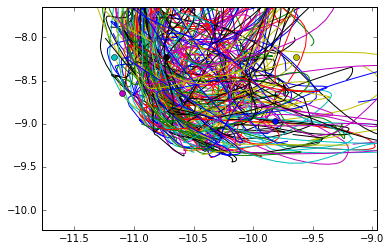

In [9]:
m_list = []
sound_list = []
sound_dict = {}

vowels_dict = {}

for i in range(500):
    m = env.motor_babbling()
    m_list.append(m)
    s_traj = env.diva.update(m[21:], audio=False)
    sound = check_sounds(s_traj)
    sound_list.append(sound)
    if sound_dict.has_key(sound):
        sound_dict[sound] += [i]
    else:
        sound_dict[sound] = [i]
    for v in vowels:
        if v in sound:
            if vowels_dict.has_key(v):
                vowels_dict[v] += [i]
            else:
                vowels_dict[v] = [i]
    plt.plot([-f[1] for f in s_traj], [-f[0] for f in s_traj])
    
plt.xlim([-np.log2([3500.]), -np.log2([500.])])
plt.ylim([-np.log2([1200.]), -np.log2([200.])])
for v in vowels.keys():
    plt.plot(-vowels[v][1], -vowels[v][0], "o")
    
print
for key in sound_dict.keys():
    if not key == "NNN":
        print "Sound:", key, "  Iterations: ", sound_dict[key]
print
for v in vowels:
    if vowels_dict.has_key(v):
        print "Vowel [", v, "] played", len(vowels_dict[v]), "times"
    
def listen(i):
    print "Playing sound: ", sound_list[i], "of iteration ", i
    m = m_list[i]
    env_audio.diva.update(m[21:])
    
def listen_triplets():
    for key in sound_dict.keys():
        if not (key[0] == "N" or key[1] == "N" or key[2] == "N"):
            for i in sound_dict[key]:
                listen(i)
                time.sleep(1)

In [10]:
listen_triplets()

Playing sound:  yyy of iteration  74
Playing sound:  oyy of iteration  985
Playing sound:  yii of iteration  993
Playing sound:  yoo of iteration  139
Playing sound:  yie of iteration  802



Sound: NNo   Iterations:  [167, 168, 301, 322, 343, 392, 400, 401, 408, 447]
Sound: NoN   Iterations:  [114, 115, 116, 224, 263, 317, 370, 417, 470]
Sound: Nyy   Iterations:  [186, 187, 188, 189, 287, 348]
Sound: NiN   Iterations:  [220, 229, 244, 270, 402, 460]
Sound: yNi   Iterations:  [192, 473]
Sound: NNi   Iterations:  [58, 82, 129, 147, 394]
Sound: NNe   Iterations:  [42, 43, 68, 69, 70, 71, 83, 280, 412, 466]
Sound: ieN   Iterations:  [297, 449]
Sound: yyy   Iterations:  [357]
Sound: oyN   Iterations:  [491]
Sound: iNN   Iterations:  [26, 45, 132, 133, 134, 135, 136, 273, 360, 416]
Sound: Nyi   Iterations:  [213]
Sound: yNy   Iterations:  [157, 158, 359]
Sound: NNy   Iterations:  [24, 107, 108, 109, 122, 123, 154, 205, 217, 277, 303, 320, 334, 352, 353, 381, 384, 390, 410, 436, 443, 492, 498, 499]
Sound: Ney   Iterations:  [206]
Sound: NNu   Iterations:  [211]
Sound: NeN   Iterations:  [72, 73, 74, 215, 228, 240, 345, 411, 437]
Sound: yNN   Iterations:  [66, 80, 84, 85, 86, 101

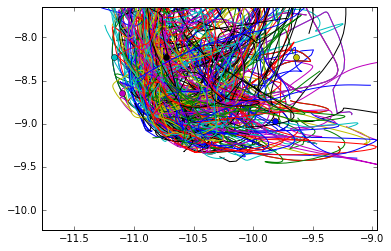

In [8]:
# GOAL BABBLING

from cogsci2017.learning.supervisor import Supervisor

config = dict(m_mins=env.conf.m_mins,
             m_maxs=env.conf.m_maxs,
             s_mins=env.conf.s_mins,
             s_maxs=env.conf.s_maxs)

agent = Supervisor(config, explo_noise=0.2)
n_motor_babbling = 200

m_list = []
sound_dict = {}

vowels_dict = {}


# Active Model Babbling
for i in range(500):
    if i < n_motor_babbling:
        m = agent.motor_babbling()
    else:
        context = env.get_current_context()
        m = agent.produce(context)
    s = env.update(m)
    agent.perceive(s)
    
    m_list.append(m)
    s_traj = env.diva_traj
    
    sound = check_sounds(s_traj)
    if sound_dict.has_key(sound):
        sound_dict[sound] += [i]
    else:
        sound_dict[sound] = [i]
    for v in vowels:
        if v in sound:
            if vowels_dict.has_key(v):
                vowels_dict[v] += [i]
            else:
                vowels_dict[v] = [i]
    plt.plot([-f[1] for f in s_traj], [-f[0] for f in s_traj])
    
plt.xlim([-np.log2([3500.]), -np.log2([500.])])
plt.ylim([-np.log2([1200.]), -np.log2([200.])])
for v in vowels.keys():
    plt.plot(-vowels[v][1], -vowels[v][0], "o")
    
print
for key in sound_dict.keys():
    if not key == "NNN":
        print "Sound:", key, "  Iterations: ", sound_dict[key]
print
for v in vowels:
    if vowels_dict.has_key(v):
        print "Vowel [", v, "] played", len(vowels_dict[v]), "times"
    
def listen(i):
    print "Playing sound: ", sound_list[i], "of iteration ", i
    m = m_list[i]
    env_audio.diva.update(m[21:])
    
def listen_triplets():
    for key in sound_dict.keys():
        if not (key[0] == "N" or key[1] == "N" or key[2] == "N"):
            for i in sound_dict[key]:
                listen(i)
                time.sleep(1)

In [24]:
listen(54)

Playing sound:  eNN of iteration  54


In [ ]:
import scipy

sound = "uyi"
polynom1 = scipy.interpolate.lagrange([vowels[v] for v in sound])


human_sounds = ["uyi", "ieu", "euo", "oiy", "yoe", "eui"]

human_sounds_traj = dict()
for hs in human_sounds:
    